## Introduction
I mbarked on an engaging project analyzing vegetable prices using the dataset from Agmarknet. This project provides a valuable resource for researchers, analysts, and enthusiasts interested in understanding the dynamics of vegetable pricing trends. 

So to accomplish this project I followed a systematic approach that emphasizes cleanliness, exploration, and visualization.

## Data Collection & Cleaning
The official source for my dataset is Agmarknet https://agmarknet.gov , this is where I fetched the data on vegetable prices. On my analysis I will be focusing on vegetable prices, so the project's data will include daily price updates for different markets.

In [1]:
import pandas as pd
dataset = pd.read_csv('/home/nomfundo/Veggies/analyzing-vegetable-prices/prices.csv')

In [2]:
dataset.head()  # View the first few rows
dataset.info()  # Check data types and missing values
dataset.describe()  # Summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [3]:
#Handle Missing Values: Identify and impute or remove missing data where necessary.

missing_values = dataset.isnull().sum()
dataset.fillna(method='ffill', inplace=True)  # Example of forward filling

/tmp/ipykernel_356/2150786932.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Example of forward filling


In [4]:
print(dataset.columns)

Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')


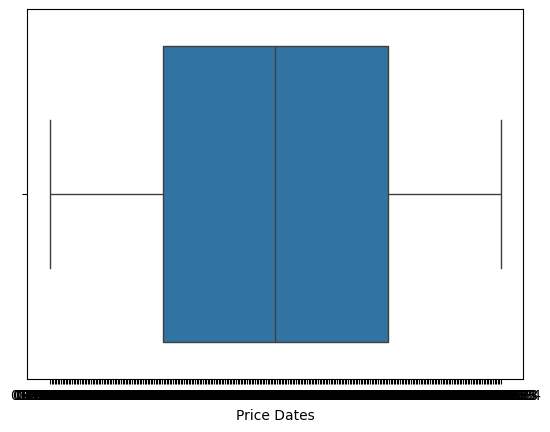

In [5]:
#Identify Outliers: Used statistical methods, such as z-scores or IQR, to detect outliers. Visualized this with boxplots
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dataset, x="Price Dates")
plt.show()

In [6]:
#Filtering Numerical Data: Keep only the relevant numerical columns (like price, quantity).
#Scaling Data: Normalized the data to ensure that features contribute equally.
numerical_data = dataset.select_dtypes(include=['float64', 'int64'])

## Exploratory Data Analysis
Let's build an interactive analysis that walks you through comparing vegetable prices, extracting insights, and documenting everything in a clear manner.


In [7]:
# Load the dataset
dataset = pd.read_csv('/home/nomfundo/Veggies/analyzing-vegetable-prices/prices.csv')
# Display the first few rows of the dataset to understand its structure
dataset.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


In [8]:
print(dataset.columns)

Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')


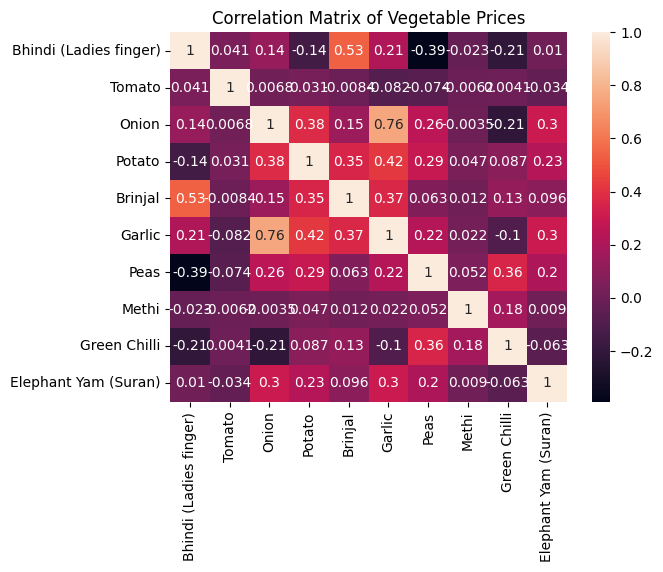

In [9]:
# Price Trends Over Time (Assuming 'Price Dates' represents dates):
import seaborn as sns

# Filter data for non-zero prices
filtered_data = dataset[dataset.columns[1:]]  # Exclude first column
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric (optional)

# Calculate correlation matrix
corr_matrix = filtered_data.corr()

# Create a heatmap to visualize correlations between vegetable prices
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Vegetable Prices')
plt.show()


#Each cell in the matrix represents the correlation coefficient between two vegetables.
#A correlation coefficient ranges from -1 to 1:
# 1: Indicates a perfect positive correlation. Prices of both vegetables move in the same direction (e.g., when the price of one increases, the other also increases).
# -1: Indicates a perfect negative correlation. Prices move in opposite directions (e.g., when the price of one increases, the other decreases)
#  0: Indicates no correlation between the prices.

Market Basket Analysis: Researchers can identify groups of vegetables that are frequently purchased together (e.g., complementary goods). This information can be used to optimize product placement in stores or create targeted marketing campaigns.
Pricing Strategies: Retailers can use this knowledge to strategically price related vegetables to encourage cross-selling and increase sales.

## Statistical Data Analysis
Analyze the relationships between the prices of different vegetables by calculating the correlation matrix.

In [10]:
import pandas as pd
# Convert all columns to numeric (to ensure we are working with numbers)
filtered_data = dataset[dataset.columns[1:]]  # Exclude the first column (possibly date or ID column)
filtered_data = filtered_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, handle errors

# Calculate correlation matrix to see relationships between vegetable prices
corr_matrix = filtered_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                        Bhindi (Ladies finger)    Tomato     Onion    Potato  \
Bhindi (Ladies finger)                1.000000  0.040505  0.135353 -0.142327   
Tomato                                0.040505  1.000000  0.006829  0.030737   
Onion                                 0.135353  0.006829  1.000000  0.380323   
Potato                               -0.142327  0.030737  0.380323  1.000000   
Brinjal                               0.534585 -0.008361  0.147386  0.353733   
Garlic                                0.211865 -0.081934  0.755264  0.419036   
Peas                                 -0.391240 -0.074097  0.255033  0.289854   
Methi                                -0.022921 -0.006247 -0.003529  0.047102   
Green Chilli                         -0.209258  0.004062 -0.214595  0.087301   
Elephant Yam (Suran)                  0.010470 -0.034045  0.300265  0.225328   

                         Brinjal    Garlic      Peas     Methi  Green Chilli  \
Bhindi (Ladies fing

We first filter the dataset to ensure that all the prices are numeric and handle any missing or invalid data. We then compute the correlation matrix, which quantifies how strongly prices of different vegetables are related (correlated) to each other. Correlation coefficients range from -1 to 1. A coefficient of: 1 means perfect positive correlation (prices move in the same direction). -1 means perfect negative correlation (prices move in opposite directions). 0 means no correlation.

## Data Visualization
Visualize the correlation matrix and price trends over time.

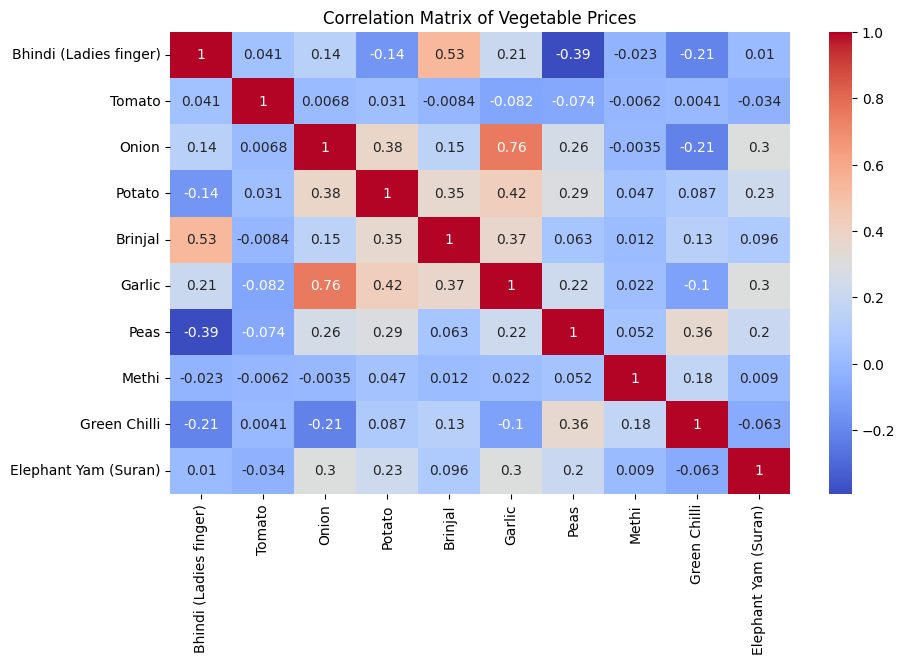

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
#Correlation Heatmap
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Vegetable Prices')
plt.show()


The correlation matrix shows how the prices of different vegetables relate to each other. A high positive correlation, like between onion and garlic (0.76), suggests that their prices tend to rise or fall together. Brinjal and bhindi (0.53) also have a moderate positive correlation, indicating a similar price pattern. On the other hand, there are negative correlations, such as bhindi and peas (-0.39), meaning that when one increases in price, the other tends to decrease. Most of the other correlations are low, showing that many vegetables don't have a strong price relationship with each other.

In [14]:
print(dataset.columns)


Index(['Price Dates', 'Bhindi (Ladies finger)', 'Tomato', 'Onion', 'Potato',
       'Brinjal', 'Garlic', 'Peas', 'Methi', 'Green Chilli',
       'Elephant Yam (Suran)'],
      dtype='object')


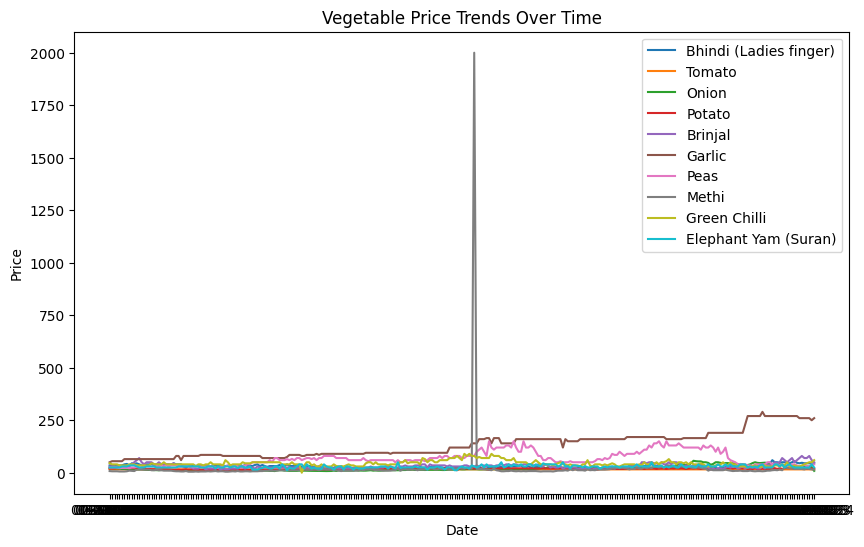

In [15]:
#Price Trends Over Time
# Line plot for price trends over time
plt.figure(figsize=(10, 6))

# Use 'Price Dates' for the date column
for column in filtered_data.columns:
    if column != 'Price Dates':  # Ensure we don't try to plot the 'Price Dates' column itself
        plt.plot(dataset['Price Dates'], dataset[column], label=column)

plt.title('Vegetable Price Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()



The plot shows that most vegetable prices are fairly stable, fluctuating between 0 and 250 units with only minor changes over time. However, there is a significant price spike in the middle, likely for garlic, which stands out as unusual and may need further investigation to determine if it's an error or caused by market conditions. Toward the end, some vegetables, like peas and elephant yam, show a slight upward trend in price. Additionally, the date labels on the x-axis are cluttered and hard to read, which could be improved for better clarity.

## Reporting Process
Automate report generation for the statistical insights and visualizations.

In [17]:
from fpdf import FPDF

# Create a PDF report
pdf = FPDF()
pdf.add_page()

# Add a title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Vegetable Price Analysis Report", ln=True, align="C")

# Add a subtitle
pdf.set_font("Arial", 'B', 12)
pdf.cell(200, 10, txt="Correlation Analysis of Vegetable Prices:", ln=True)

# Add the correlation matrix to the report
pdf.set_font("Arial", size=10)
pdf.multi_cell(0, 10, txt=f"Correlation Matrix:\n{corr_matrix.to_string()}")

# Add any additional insights here
pdf.cell(200, 10, txt="Visualizations of Price Trends and Correlations are included.", ln=True)

# Save the report to a file
pdf.output("Vegetable_Price_Analysis_Report.pdf")


ModuleNotFoundError: No module named 'fpdf'